### instalar API e importar bibliotecas:

In [32]:
import sys
!{sys.executable} -m pip install wbgapi


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Seleção das informações (series) que serão incluidas na tabela para análise:

##### Para encontrar os códigos referentes a cada indicador, basta ir em https://data.worldbank.org/indicator, selecionar o indicador e copiar o que tem escrito depois da ultima barra da url.

In [34]:
paises = ['BRA', 'ARG', 'BOL', 'CHL', 'COL', 'ECU', 'PRY', 'PER', 'URY', 'VEN', 'GUY', 'SUR']
periodo = range(2000, 2023)
indicadores = {
    "SP.POP.TOTL": "População Total",
    "SP.DYN.LE00.IN": "Expectativa de Vida",
    "SH.DYN.MORT": "Mortalidade Infantil (por 1000)",
    "SP.ADO.TFRT": "Taxa de fertilidade na adolescência (nascimentos por 1.000 mulheres de 15 a 19 anos)",
    "SH.XPD.CHEX.GD.ZS": "Gastos com Saúde (% do PIB)",
    "SN.ITK.DEFC.ZS": "Prevalência de desnutrição (% da população)",
    "SL.UEM.TOTL.FE.ZS": "Desemprego Feminino (%)",
    "SL.UEM.TOTL.MA.ZS": "Desemprego Masculino (%)",
    "SI.POV.DDAY" : "Taxa de pobreza de US$ 3,00 por dia (%)",
    "EG.ELC.ACCS.ZS": "Acesso à eletricidade (% da população)",
    "SH.STA.BASS.ZS": "Acesso ao Saneamento Básico (%)",
    "SH.H2O.BASW.ZS": "Acesso à Água Potável (%)",
    "NY.GDP.PCAP.KD": "PIB per capita",
    "E.ADT.LITR.ZS": "Taxa de alfabetização, total de adultos (% de pessoas com 15 anos ou mais)",
    "TX.VAL.FUEL.ZS.UN": "Exportações de combustíveis",
}

df_data = wb.data.DataFrame(
    list(indicadores.keys()), 
    paises, 
    time=periodo,
    labels=True
)


df_data.head()

,,Country,Series,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,series,,,,,,,,,,,,,,,,,,,,,
SUR,SP.POP.TOTL,Suriname,"Population, total",476643.0,486560.0,496551.0,506414.0,513923.0,519313.0,524997.0,531016.0,...,569020.0,575373.0,581627.0,587757.0,593713.0,599513.0,605768.0,612317.0,617896.0,623164.0
GUY,SP.POP.TOTL,Guyana,"Population, total",764832.0,764477.0,763652.0,763101.0,762418.0,760914.0,758966.0,756861.0,...,750021.0,754229.0,758781.0,763548.0,768479.0,791556.0,807665.0,807481.0,815482.0,821637.0
VEN,SP.POP.TOTL,"Venezuela, RB","Population, total",24526708.0,24979922.0,25435671.0,25892703.0,26340838.0,26785804.0,27224686.0,27649363.0,...,29912198.0,30254079.0,30573972.0,30765720.0,30565323.0,29807592.0,28938098.0,28444077.0,28237826.0,28213017.0
URY,SP.POP.TOTL,Uruguay,"Population, total",3266206.0,3274251.0,3278867.0,3281186.0,3283148.0,3285771.0,3289506.0,3295153.0,...,3345337.0,3356334.0,3368017.0,3379283.0,3388438.0,3394534.0,3397206.0,3398968.0,3396695.0,3390913.0
PER,SP.POP.TOTL,Peru,"Population, total",26598331.0,26964601.0,27288217.0,27580490.0,27852190.0,28101180.0,28324491.0,28530699.0,...,29817919.0,30115826.0,30457600.0,30866494.0,31324637.0,31897584.0,32449303.0,32838579.0,33155882.0,33475438.0


In [35]:
df_data.shape

(168, 25)

In [36]:
df_data.dtypes

Country     object
Series      object
YR2000     float64
YR2001     float64
YR2002     float64
YR2003     float64
YR2004     float64
YR2005     float64
YR2006     float64
YR2007     float64
YR2008     float64
YR2009     float64
YR2010     float64
YR2011     float64
YR2012     float64
YR2013     float64
YR2014     float64
YR2015     float64
YR2016     float64
YR2017     float64
YR2018     float64
YR2019     float64
YR2020     float64
YR2021     float64
YR2022     float64
dtype: object

In [37]:
df_data.columns.tolist()


['Country',
 'Series',
 'YR2000',
 'YR2001',
 'YR2002',
 'YR2003',
 'YR2004',
 'YR2005',
 'YR2006',
 'YR2007',
 'YR2008',
 'YR2009',
 'YR2010',
 'YR2011',
 'YR2012',
 'YR2013',
 'YR2014',
 'YR2015',
 'YR2016',
 'YR2017',
 'YR2018',
 'YR2019',
 'YR2020',
 'YR2021',
 'YR2022']

### Tranformar os anos em linhas e o título das series em colunas e adaptar a escrita e o tipo dos anos:

In [38]:
df_long = df_data.melt(
    id_vars=['Country', 'Series'],   
    var_name='Ano',
    value_name='Valor'
)

df_long['Ano'] = df_long['Ano'].str.replace('YR', '').astype(int)


In [39]:
df_long.dtypes

Country     object
Series      object
Ano          int64
Valor      float64
dtype: object

In [40]:
df_data = df_long.pivot_table(
    index=['Country', 'Ano'],
    columns='Series',
    values='Valor'
).reset_index()

### Tabela pronta para análise:

In [41]:
df_data.head()

Series,Country,Ano,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Current health expenditure (% of GDP),Fuel exports (% of merchandise exports),GDP per capita (constant 2015 US$),"Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Prevalence of undernourishment (% of population),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)"
0,Argentina,2000,95.7,65.808,8.220011,17.624183,10631.650364,73.910,19.4,96.284026,87.666927,37213984.0,7.3,NaN,16.356,14.029
1,Argentina,2001,95.5,63.491,8.371799,17.027214,10051.944846,74.154,18.8,96.522820,88.135939,37624825.0,10.7,2.9,17.191,17.411
2,Argentina,2002,96.1,62.126,7.393312,17.006238,8861.561993,74.312,18.3,96.755469,88.603394,38029349.0,17.1,3.7,18.823,20.122
3,Argentina,2003,96.3,60.002,6.894516,17.083063,9545.531941,74.307,17.8,96.982417,89.069563,38424282.0,8.2,4.3,17.577,13.806
4,Argentina,2004,96.5,61.681,7.228683,16.000290,10302.446532,74.871,17.3,97.204346,89.535068,38815916.0,6.0,3.9,15.823,11.893


In [42]:
df_data.shape

(276, 16)

In [43]:
df_data.columns.tolist()

['Country',
 'Ano',
 'Access to electricity (% of population)',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Current health expenditure (% of GDP)',
 'Fuel exports (% of merchandise exports)',
 'GDP per capita (constant 2015 US$)',
 'Life expectancy at birth, total (years)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'People using at least basic drinking water services (% of population)',
 'People using at least basic sanitation services (% of population)',
 'Population, total',
 'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)',
 'Prevalence of undernourishment (% of population)',
 'Unemployment, female (% of female labor force) (modeled ILO estimate)',
 'Unemployment, male (% of male labor force) (modeled ILO estimate)']

In [44]:
df_data.isna().sum()

Series
Country                                                                   0
Ano                                                                       0
Access to electricity (% of population)                                   0
Adolescent fertility rate (births per 1,000 women ages 15-19)             0
Current health expenditure (% of GDP)                                    18
Fuel exports (% of merchandise exports)                                  11
GDP per capita (constant 2015 US$)                                       23
Life expectancy at birth, total (years)                                   0
Mortality rate, under-5 (per 1,000 live births)                           0
People using at least basic drinking water services (% of population)     6
People using at least basic sanitation services (% of population)         6
Population, total                                                         0
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)      85
Preva

In [45]:
df_data.dtypes

Series
Country                                                                   object
Ano                                                                        int64
Access to electricity (% of population)                                  float64
Adolescent fertility rate (births per 1,000 women ages 15-19)            float64
Current health expenditure (% of GDP)                                    float64
Fuel exports (% of merchandise exports)                                  float64
GDP per capita (constant 2015 US$)                                       float64
Life expectancy at birth, total (years)                                  float64
Mortality rate, under-5 (per 1,000 live births)                          float64
People using at least basic drinking water services (% of population)    float64
People using at least basic sanitation services (% of population)        float64
Population, total                                                        float64
Poverty headcount rat

Tratamento de Dados Faltantes

In [46]:
linhas_com_nan = df_data[df_data.isna().any(axis=1)]
linhas_com_nan

Series,Country,Ano,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Current health expenditure (% of GDP),Fuel exports (% of merchandise exports),GDP per capita (constant 2015 US$),"Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Prevalence of undernourishment (% of population),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)"
0,Argentina,2000,95.7,65.808,8.220011,17.624183,10631.650364,73.910,19.4,96.284026,87.666927,37213984.0,7.3,NaN,16.356,14.029
15,Argentina,2015,99.7,63.879,10.229337,2.538595,13679.626498,76.600,11.7,98.982308,94.420408,43477012.0,NaN,2.8,8.706,6.798
17,Argentina,2017,100.0,55.022,10.231748,2.785001,13520.112985,76.543,11.0,NaN,NaN,44288894.0,1.1,3.4,9.485,7.544
18,Argentina,2018,100.0,49.926,10.291469,4.119304,13058.328545,76.770,10.7,NaN,NaN,44654882.0,1.6,3.5,10.563,8.246
19,Argentina,2019,100.0,41.751,10.155511,3.597722,12706.397811,76.847,10.5,NaN,NaN,44973465.0,1.7,3.5,10.718,9.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,"Venezuela, RB",2018,99.9,75.503,2.416913,NaN,NaN,72.641,24.3,94.039990,96.214417,29807592.0,NaN,23.2,6.167,5.001
272,"Venezuela, RB",2019,99.8,74.487,2.185637,NaN,NaN,72.766,24.3,93.862896,96.759710,28938098.0,NaN,23.9,6.478,5.487
273,"Venezuela, RB",2020,99.9,73.750,4.116152,NaN,NaN,72.369,24.3,93.685801,96.986065,28444077.0,NaN,22.2,7.907,7.286
274,"Venezuela, RB",2021,100.0,73.384,4.102220,NaN,NaN,71.536,24.3,93.508706,97.002357,28237826.0,NaN,20.0,7.548,6.705


In [47]:
df_data.isnull().sum()

Series
Country                                                                   0
Ano                                                                       0
Access to electricity (% of population)                                   0
Adolescent fertility rate (births per 1,000 women ages 15-19)             0
Current health expenditure (% of GDP)                                    18
Fuel exports (% of merchandise exports)                                  11
GDP per capita (constant 2015 US$)                                       23
Life expectancy at birth, total (years)                                   0
Mortality rate, under-5 (per 1,000 live births)                           0
People using at least basic drinking water services (% of population)     6
People using at least basic sanitation services (% of population)         6
Population, total                                                         0
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)      85
Preva

In [48]:
colunas_com_nulos = [
    'Current health expenditure (% of GDP)',
    'GDP per capita (constant 2015 US$)',
    'People using at least basic drinking water services (% of population)',
    'People using at least basic sanitation services (% of population)',
    'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)',
    'Prevalence of undernourishment (% of population)',
    'Fuel exports (% of merchandise exports)',
]

#ordenando por país
df_data = df_data.sort_values(by=['Country', 'Ano'])

#agrupando por país e interpolando linearmente
for col in colunas_com_nulos:
    df_data[col] = df_data.groupby('Country')[col].transform(
        lambda x: x.interpolate(method='linear')
    )

In [49]:
#verificando nulos restantes
print(df_data[colunas_com_nulos].isna().sum())

Series
Current health expenditure (% of GDP)                                    18
GDP per capita (constant 2015 US$)                                       23
People using at least basic drinking water services (% of population)     0
People using at least basic sanitation services (% of population)         0
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)      48
Prevalence of undernourishment (% of population)                         12
Fuel exports (% of merchandise exports)                                   0
dtype: int64


In [50]:
#preenchendo os nulos restantes com a mediana da coluna
df_data[colunas_com_nulos] = df_data[colunas_com_nulos].apply(
    lambda x: x.fillna(x.median())
)

#ultima verificação
print(df_data[colunas_com_nulos].isna().sum())

Series
Current health expenditure (% of GDP)                                    0
GDP per capita (constant 2015 US$)                                       0
People using at least basic drinking water services (% of population)    0
People using at least basic sanitation services (% of population)        0
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)      0
Prevalence of undernourishment (% of population)                         0
Fuel exports (% of merchandise exports)                                  0
dtype: int64


In [51]:
df_data.isnull().sum()

Series
Country                                                                  0
Ano                                                                      0
Access to electricity (% of population)                                  0
Adolescent fertility rate (births per 1,000 women ages 15-19)            0
Current health expenditure (% of GDP)                                    0
Fuel exports (% of merchandise exports)                                  0
GDP per capita (constant 2015 US$)                                       0
Life expectancy at birth, total (years)                                  0
Mortality rate, under-5 (per 1,000 live births)                          0
People using at least basic drinking water services (% of population)    0
People using at least basic sanitation services (% of population)        0
Population, total                                                        0
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)      0
Prevalence of unde

### Feature de década

In [52]:
df_data['Decada'] = (df_data['Ano'] // 10) * 10
df_data['Decada']

0      2000
1      2000
2      2000
3      2000
4      2000
       ... 
271    2010
272    2010
273    2020
274    2020
275    2020
Name: Decada, Length: 276, dtype: int64

### Feature de Crescimento do PIB per capita (ano a ano)

In [53]:
# ordena os dados para garantir que o cálculo seja feito na ordem correta dos anos
df_data.sort_values(by=['Country', 'Ano'])

# .pct_change() calcula a mudança percentual em relação à linha anterior
df_data['Crescimento_PIB_pc'] = df_data.groupby('Country')['GDP per capita (constant 2015 US$)'].pct_change() * 100

In [54]:
df_data[['Country', 'Ano', 'Decada', 'GDP per capita (constant 2015 US$)', 'Crescimento_PIB_pc']].tail()

Series,Country,Ano,Decada,GDP per capita (constant 2015 US$),Crescimento_PIB_pc
271,"Venezuela, RB",2018,2010,6316.070678,0.0
272,"Venezuela, RB",2019,2010,6316.070678,0.0
273,"Venezuela, RB",2020,2020,6316.070678,0.0
274,"Venezuela, RB",2021,2020,6316.070678,0.0
275,"Venezuela, RB",2022,2020,6316.070678,0.0


### Evolução da expectativa de vida em determinados países

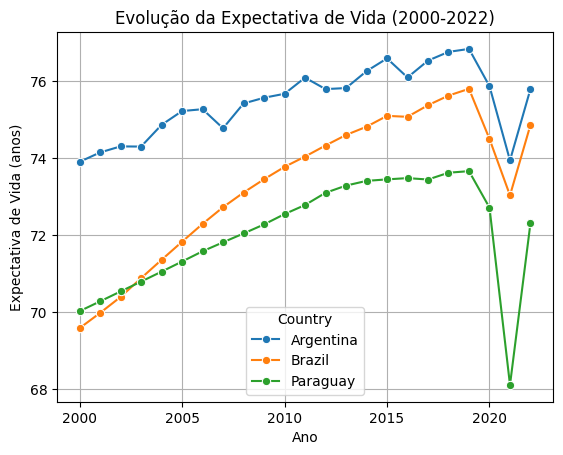

In [55]:
plt.title('Evolução da Expectativa de Vida (2000-2022)')

# filtra os dados para os países de interesse
df_br_ar = df_data[df_data['Country'].isin(['Brazil', 'Argentina', 'Paraguay'])]

sns.lineplot(x='Ano', y='Life expectancy at birth, total (years)', hue='Country', data=df_br_ar, marker='o')
plt.ylabel('Expectativa de Vida (anos)')
plt.grid(True)
plt.show()

### Comparação do PIB per capita no último ano

C:\Users\fevas\AppData\Local\Temp\ipykernel_11012\1361927318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gdp_medio.values, y=gdp_medio.index, palette='plasma')


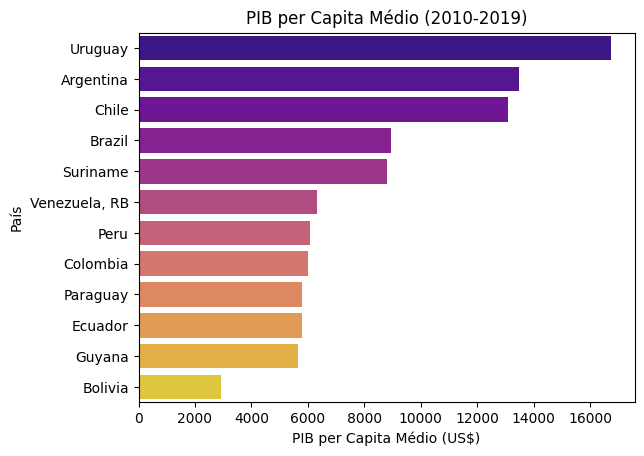

In [56]:
plt.title('PIB per Capita Médio (2010-2019)')

# Filtra os dados para a década de 2010
df_2010s = df_data[df_data['Decada'] == 2010]

# Calcula a média por país
gdp_medio = df_2010s.groupby('Country')['GDP per capita (constant 2015 US$)'].mean().sort_values(ascending=False)

sns.barplot(x=gdp_medio.values, y=gdp_medio.index, palette='plasma')
plt.xlabel('PIB per Capita Médio (US$)')
plt.ylabel('País')
plt.show()

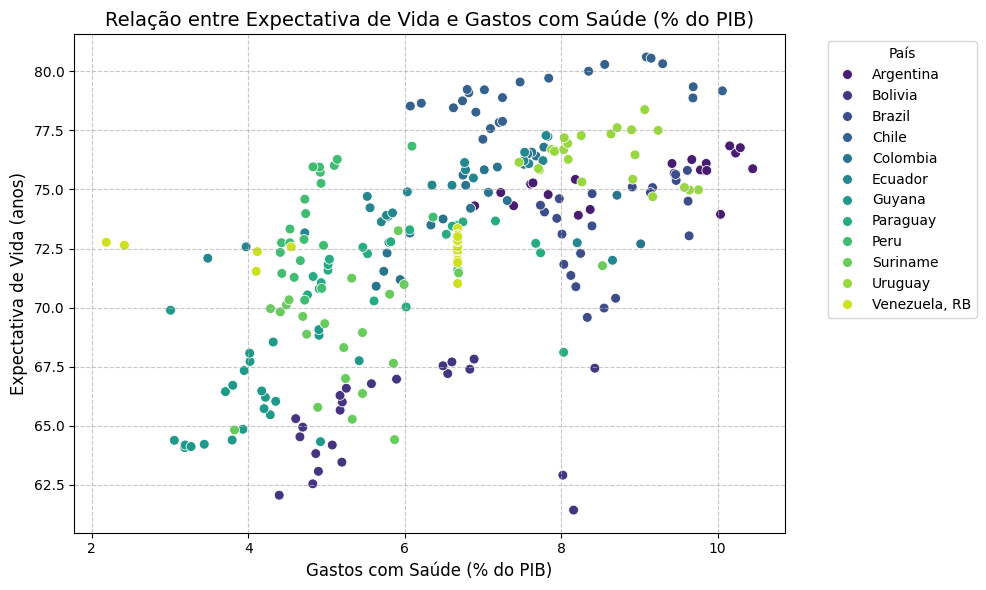

In [57]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_data,
    x='Current health expenditure (% of GDP)',
    y='Life expectancy at birth, total (years)',
    hue='Country',
    palette='viridis',
    s=50
)

plt.title('Relação entre Expectativa de Vida e Gastos com Saúde (% do PIB)', fontsize=14)
plt.xlabel('Gastos com Saúde (% do PIB)', fontsize=12)
plt.ylabel('Expectativa de Vida (anos)', fontsize=12)

plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [58]:
df_data

Series,Country,Ano,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Current health expenditure (% of GDP),Fuel exports (% of merchandise exports),GDP per capita (constant 2015 US$),"Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Prevalence of undernourishment (% of population),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)",Decada,Crescimento_PIB_pc
0,Argentina,2000,95.7,65.808,8.220011,17.624183,10631.650364,73.910,19.4,96.284026,87.666927,37213984.0,7.3,6.2,16.356,14.029,2000,NaN
1,Argentina,2001,95.5,63.491,8.371799,17.027214,10051.944846,74.154,18.8,96.522820,88.135939,37624825.0,10.7,2.9,17.191,17.411,2000,-5.452639
2,Argentina,2002,96.1,62.126,7.393312,17.006238,8861.561993,74.312,18.3,96.755469,88.603394,38029349.0,17.1,3.7,18.823,20.122,2000,-11.842314
3,Argentina,2003,96.3,60.002,6.894516,17.083063,9545.531941,74.307,17.8,96.982417,89.069563,38424282.0,8.2,4.3,17.577,13.806,2000,7.718390
4,Argentina,2004,96.5,61.681,7.228683,16.000290,10302.446532,74.871,17.3,97.204346,89.535068,38815916.0,6.0,3.9,15.823,11.893,2000,7.929517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,"Venezuela, RB",2018,99.9,75.503,2.416913,97.677807,6316.070678,72.641,24.3,94.039990,96.214417,29807592.0,9.7,23.2,6.167,5.001,2010,0.000000
272,"Venezuela, RB",2019,99.8,74.487,2.185637,97.677807,6316.070678,72.766,24.3,93.862896,96.759710,28938098.0,9.7,23.9,6.478,5.487,2010,0.000000
273,"Venezuela, RB",2020,99.9,73.750,4.116152,97.677807,6316.070678,72.369,24.3,93.685801,96.986065,28444077.0,9.7,22.2,7.907,7.286,2020,0.000000
274,"Venezuela, RB",2021,100.0,73.384,4.102220,97.677807,6316.070678,71.536,24.3,93.508706,97.002357,28237826.0,9.7,20.0,7.548,6.705,2020,0.000000
